# Лабораторная работа 2
Визуализация данных

Выполнил: 6133-010402D, Харитонов Никита Владимирович



0 Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
!pip install palmerpenguins

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins
sns.set_style('whitegrid')

data = load_penguins()
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [3]:
# print unique values of a few columns
for col in ['species', 'island', 'sex', 'year']:
  print(f'{col} = {data[col].unique()}')

species = ['Adelie' 'Gentoo' 'Chinstrap']
island = ['Torgersen' 'Biscoe' 'Dream']
sex = ['male' 'female' nan]
year = [2007 2008 2009]


In [4]:
# вещественные колонки:
# - bill_length_mm        длина клюва пингвина в мм
# - bill_depth_mm         высота клюва пингвина в мм
# - flipper_length_mm     длина плавника пингвина в мм
# - body_mass_g           масса тела пингвина в граммах

# целочисленные колонки:
# - year                  год проведения исследования: 2007, 2008 и 2009

# категориальный колонки:
# - species               биологический вид пингвина: пингвин Адели, cубантарктический пингвин и антарктический пингвин (^_^)
# - island                остров, на котором пингвин был исследован: Торгерсен, Биско и Дрим
# - sex                   пол пингвина: муж, жен и неопределённый

Каждый график необходимо снабдить комментарием

1 Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab




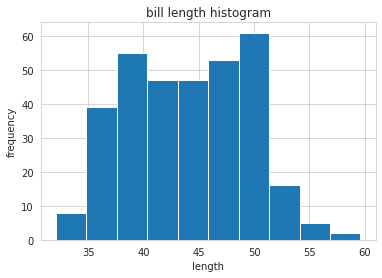

In [14]:
data = data.dropna()
plt.hist(data['bill_length_mm'])
plt.xlabel('length')
plt.ylabel('frequency')
plt.title('bill length histogram')
plt.show()

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
Хотя бы в одном графике подпишите оси.
Во всех графиках подписать название графика.

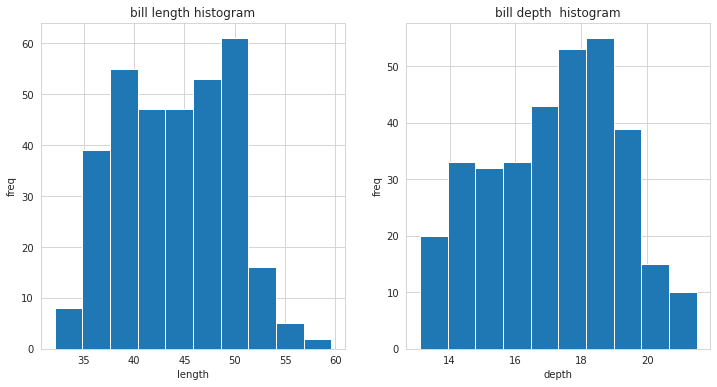

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(data['bill_length_mm'])
ax1.set_title('bill length histogram')
ax1.set_xlabel('length')
ax1.set_ylabel('frequency')
ax2.hist(data['bill_depth_mm'])
ax2.set_title('bill depth  histogram')
ax2.set_xlabel('depth')
ax2.set_ylabel('frequency')
plt.show()

2  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

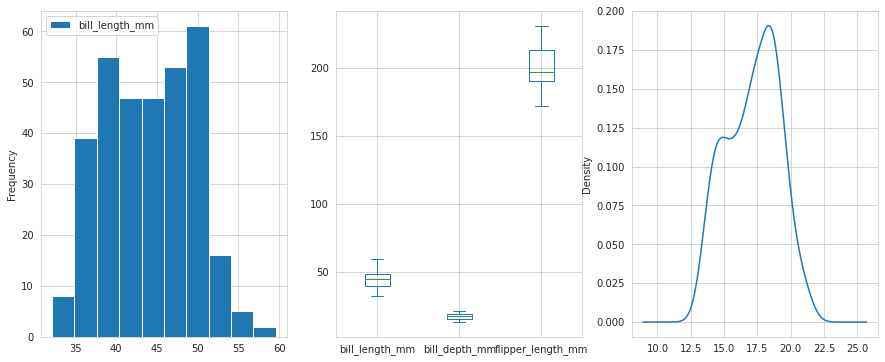

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

data.plot(y='bill_length_mm', kind='hist', ax=ax1)
data.plot(y=[2, 3, 4], kind='box', ax=ax2)
data['bill_depth_mm'].plot.kde(y='bill_depth_mm', ax=ax3)
plt.show()

3  Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных




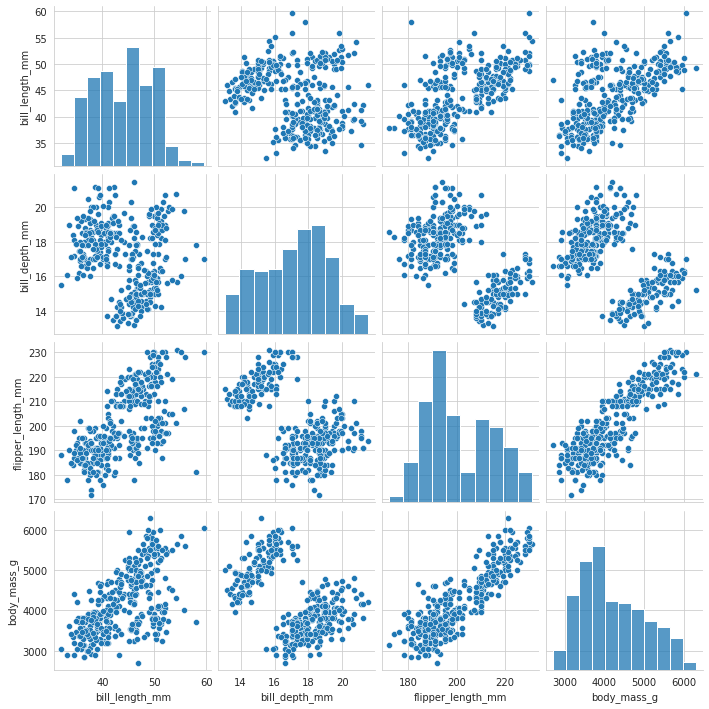

In [8]:
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.pairplot(data[numeric_columns])
plt.show()

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных


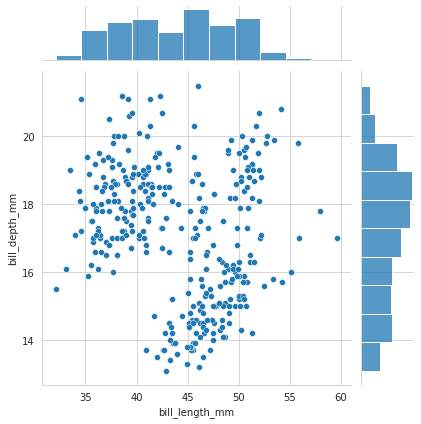

In [9]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=data)
plt.show()

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального


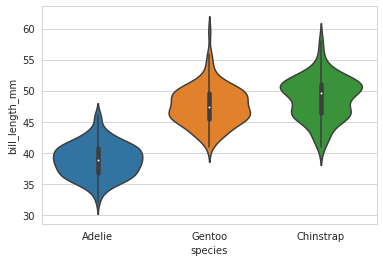

In [10]:
sns.violinplot(x='species', y='bill_length_mm', data=data)
plt.show()



3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

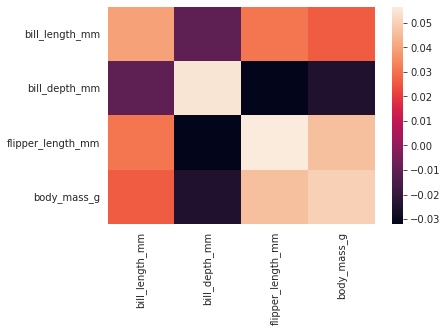

In [11]:
sns.heatmap(data[numeric_columns].apply(lambda x: ((x - x.min())/(x.max() - x.min())), axis=0).cov())
plt.show()

4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

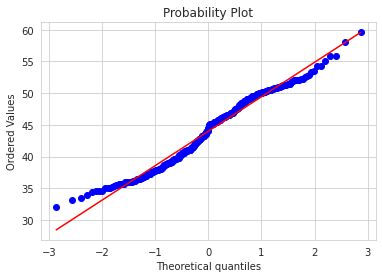

In [12]:
from scipy.stats import probplot

probplot(data['bill_length_mm'], dist='norm', plot=plt)
plt.show()

5 Построить любой график (связанный с вашими данными) с помощью plotly

In [13]:
import plotly.express as px

px.histogram(data, x='bill_length_mm')